In [23]:
import sys
sys.path.append('../src')
sys.path.append('../src/data/')
sys.path.append('../src/models/')
sys.path.append('../src/features/')
sys.path.append('../src/visualization/')
# will reload any library
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
# sportify specific
#from data.metrics import r_precision, cosine_sim_closest, cosine_sim_top, NDCG
from visualization.plot_utils import write_latex_table, summary_pooling_table,\
pooling_plots, pandas_settings, plot_settings,  save_result
# general
import pandas as pd
import numpy as np
from tqdm import tqdm
from features import AudioFeatures, TrackInfo, Popularity
from collections import OrderedDict
import matplotlib.pyplot as plt
import seaborn as sns

plot_settings()
pandas_settings()

def ranked_plots(pool,true,ranked,dist,f_name,r_type):
    sns.distplot([d for d,t in zip(dist,pool) if t in true],label='In playlist')
    sns.distplot([d for d,t in zip(dist,pool) if t not in true],label='Not in playlist')
    plt.ylabel('Normalized frequency')
    plt.xlabel('Distance')
    plt.title('{} with {}'.format(f_name,r_type))
    plt.legend()
    plt.show()
    true_rank = [i for i,t in enumerate(true)]
    estimated_rank = [i for i,t in enumerate(ranked) if t in true]
    
    plt.scatter(true_rank,estimated_rank)
    plt.plot([0, len(true)],[0, len(true)],'--',c='k',label='ideal')
    plt.xlabel('Real ranking')
    plt.ylabel('Estimated ranking')
    plt.title('{} with {}'.format(f_name,r_type))
    plt.show()

# Load track data and features

In [3]:
tracks = TrackInfo(subset='5k-')
feats = [AudioFeatures(),Popularity()]

In [ ]:
#from data.metrics import r_precision, cosine_sim_closest, cosine_sim_top, NDCG


def ranking_stats(pid,k,strat,n_pick,true_t,pool_t,true_a,pool_a):
    
    result['r precision'] = r_precision(subset_ids, x_pred[k])
    result['NDGC'] = NDCG(subset_ids, x_pred[k])
    
def pool_stats(pid,k,strat,n_pick,true_t,pool_t,true_a,pool_a):
    r_t = recall(true_t, pool_t)
    r_a = recall(true_a, pool_a)
    return OrderedDict([('pid',pid),('k',k),('strat',strat),('n',n_pick),('recall_tracks',r_t),('recall_artist',r_a)])


In [53]:
# select a feature
f = feats[0]
k=25
n_picks=5000
pid=194
strat='mean'
# rankign based on distances
turi_seed,auri_seed, turi_true,auri_true, turi_pool,auri_pool = tracks.get_playlist_pooltest(pid=pid,k=k,n=n_picks)
dist = f.distance_between_sets(turi_seed,turi_pool,strat)
sorted_indx=np.argsort(dist)
turi_ranked = [turi_pool[i] for i in sorted_indx]
auri_ranked = [auri_pool[i] for i in sorted_indx]

/home/beangoben/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


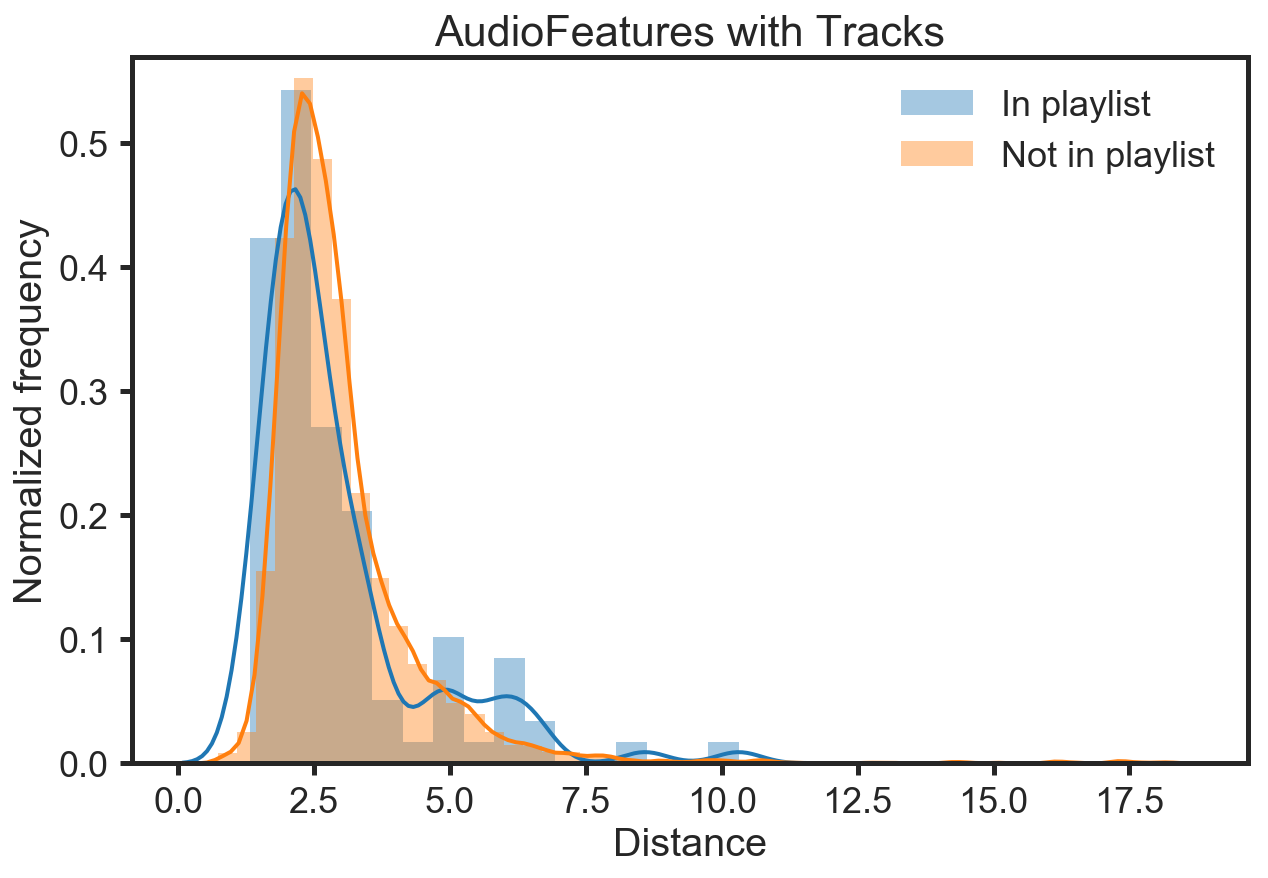

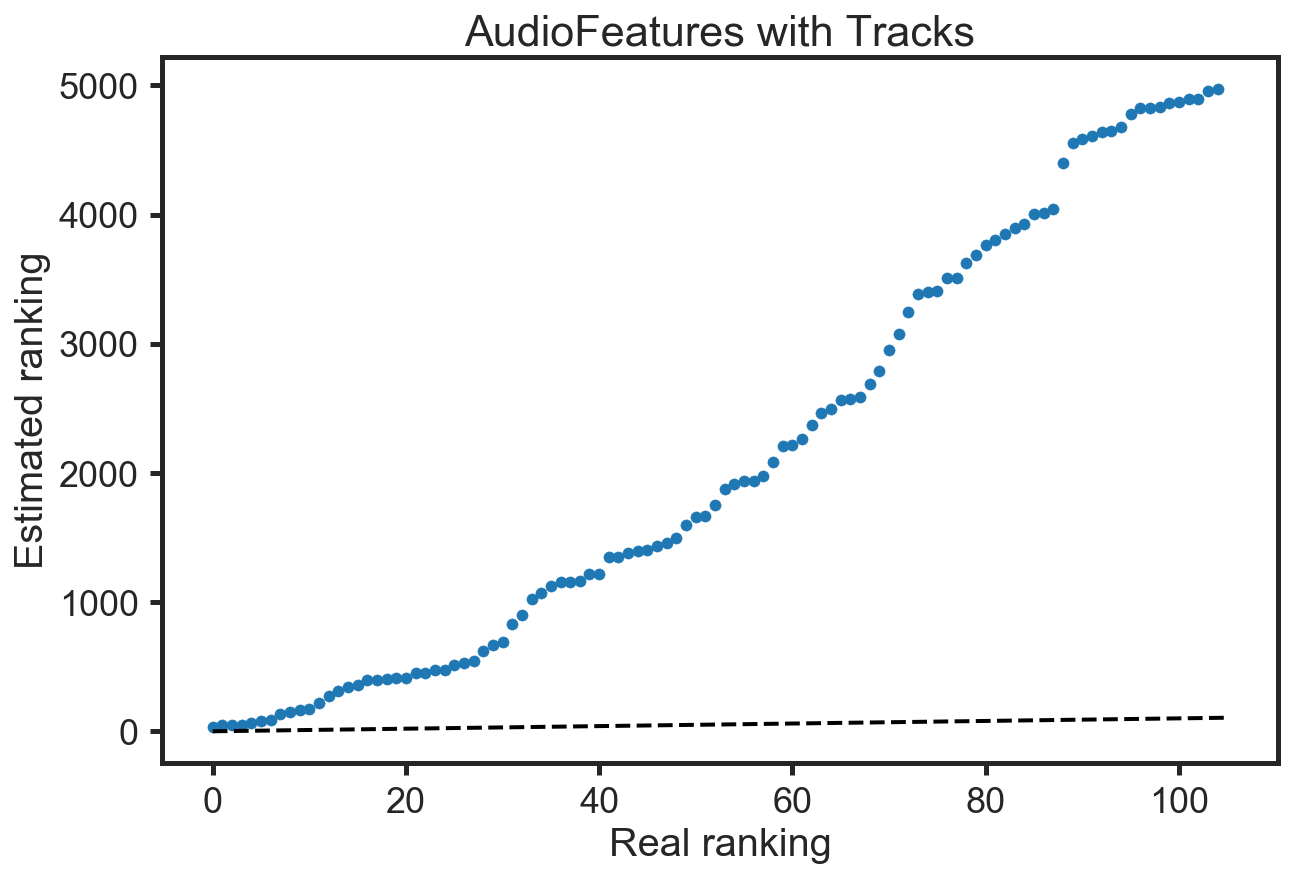

In [60]:
f_name= f.__class__.__name__
ranked_plots(turi_pool,turi_true,turi_ranked,dist,f_name,'Tracks')

In [17]:
suggest_df = pd.DataFrame()
n_top = 10
x_pred = OrderedDict()
stats = []
print('Test on playlist {:d}'.format(pid))
for k in k_range:
    x_pred[k] = []
    k_picks = int(max_picks / k)
    for i in range(k):
        x_query = xp[i - 1, :]
        ind, sim = cosine_sim_closest(X, x_query, k_picks)
        x_pred[k] = x_pred[k] + list(ind)
    subset_ids = pl_ints[k:]
    result = OrderedDict()
    result['k'] = k
    result['r precision'] = r_precision(subset_ids, x_pred[k])
    result['NDGC'] = NDCG(subset_ids, x_pred[k])
    stats.append(result)

sdf = pd.DataFrame(stats)
print(sdf)

write_latex_table(sdf, 'metrics', adir='.', render=True)

Test on playlist 194
     k  r precision      NDGC
0    1     0.023256  0.463649
1    5     0.024000  0.269681
2   10     0.033333  0.228421
3   25     0.009524  0.000000
4  100     0.000000  0.000000
